# RGI01 (Alaska)

F. Maussion & S. Galos

Equivalent to RGI6, except:
- in Kenai where we use a new inventory
- a group of glaciers we forgot in previous versions
- Northernmost glacier

In [1]:
import pandas as pd
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import (mkdir, submission_summary, needs_size_filter, size_filter, plot_map, plot_date_hist, 
                   find_duplicates, open_zip_shapefile, correct_geoms, fix_overaps)
import os

In [2]:
# Region of interest
reg = 1

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '01_rgi60_Alaska.zip')

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + os.path.join(l2_dir, f'RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp'))

In [4]:
# Specific to this region: boxes where data has to be selected differently
support_dir = os.path.join(data_dir, 'l0_support_data')

### List of submissions 

In [5]:
sdf, df_class = submission_summary(shp)
# There are loads of small submissions in this region
sdf.loc[sdf.N > 1]

N        A                                           analysts  \
subm_id                                                                      
324         36    112.5                                             Beedle   
434          2   3629.6                                             Beedle   
457          2    126.2                                             Beedle   
458          2    359.0                                             Beedle   
539        311   1240.1                                             Manley   
541        116   5207.2                                            Herreid   
543        310   1675.9                                            Herreid   
551        779   3829.1                                            Herreid   
620       8827  16219.0                                Frey, Le Bris, Paul   
621       1006   4143.5                                               Rich   
622       1283   6436.4                                               Rich   
623       5099  13836.3                                              Bolch   
624      26770  86458.7  Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
703         55   3149.7                                            Maraldo   
704         52   3062.6                                            Maraldo   
705         47   3005.4                                            Maraldo   
706         50   2905.1                                            Maraldo   
707         55   3089.5                                            Maraldo   
714         50   3214.6                                            Maraldo   
756          3      7.1  Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
766         42     10.7                                             McNabb   
767         45     18.1                                             McNabb   
772       1480   3819.2                                     Bendle, Davies   
799       1823   3857.4                                               Yang   
801       1660   4399.4                                               Yang   
802       1647   4281.2                                               Yang   
809       1755   4120.5                                         Paul, Yang   
810        431    277.6  Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
815       2510   6586.0                                            Ruether   

          submitters  release_date  \
subm_id                              
324           Beedle          2006   
434           Beedle          2007   
457           Beedle          2007   
458           Beedle          2007   
539      Racoviteanu          2009   
541           Arendt          2010   
543           Arendt          2010   
551           Arendt          2011   
620             Paul          2010   
621           Arendt          2011   
622           Arendt          2011   
623            Bolch          2009   
624           Cogley          2015   
703          Maraldo          2019   
704          Maraldo          2019   
705          Maraldo          2019   
706          Maraldo          2019   
707          Maraldo          2019   
714          Maraldo          2019   
756            Bolch          2021   
766           McNabb          2020   
767           McNabb          2020   
772           Davies          2022   
799             Yang          2022   
801             Yang          2022   
802             Yang          2022   
809             Yang          2022   
810             Paul          2023   
815          Ruether          2021   

                                                 geog_area  src_date_mode  \
subm_id                                                                     
324                                        Various (NSIDC)           2001   
434                                        Various (NSIDC)           2001   
457                                        Various (NSIDC)           2001   
458                           

In [6]:
# # Optional: write out selection in intermediate shape files for manual GIS review
# tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', f'rgi{reg:02d}_inventories'))
# tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))
# for subid in shp.subm_id.unique():
#     s_loc = shp.loc[shp.subm_id == subid]
#     s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
# print('Taring...')
# print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi{reg:02d}_inventories.tar.gz', '-C', 
#                       os.path.join(data_dir, 'l0_tmp_data'), f'rgi{reg:02d}_inventories']))

## Outline selection 

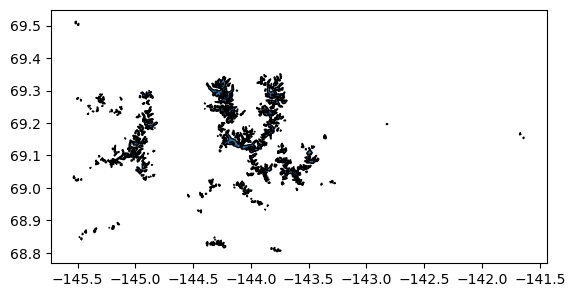

In [7]:
# This are two north glaciers (Paul) + some outline corrections
paul = shp.loc[shp.subm_id.isin([810])].copy()
paul['is_rgi6'] = False
paul.plot(edgecolor='k');

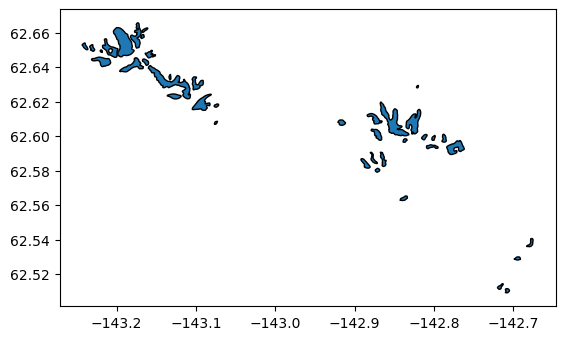

In [8]:
# This is a small group of glaciers (McNabb)
mcnabb = shp.loc[shp.subm_id.isin([766])].copy()
mcnabb['is_rgi6'] = False
mcnabb.plot(edgecolor='k');

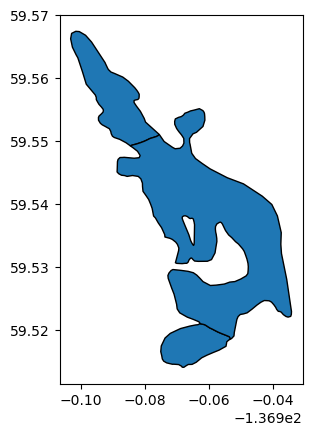

In [9]:
# This is the corrected outline in GLIMS
shp.loc[shp.subm_id.isin([756])].plot(edgecolor='k');

# This was the outline Bruce thought was ok - but it was not OK https://trello.com/c/9yUMSONP/186-new-missing-geometry-in-alaska
# shp.loc[shp.anlys_id.isin([373863])].plot(edgecolor='k');

In [10]:
# 756 is for the corrected outline
rgi6 = shp.loc[shp.subm_id.isin([624, 756])].copy()

# Nothing should change here
rgi6['is_rgi6'] = True

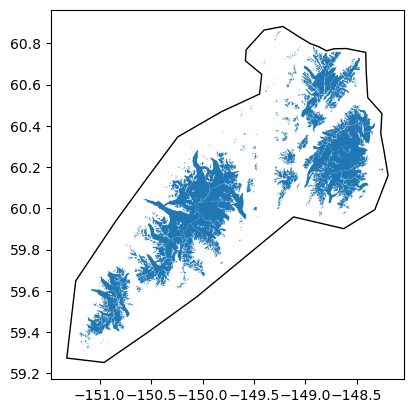

In [11]:
# Read Kenai box
shp_loc = open_zip_shapefile(support_dir + f'/kenai.zip')

kenai = shp.loc[shp.subm_id.isin([809])].copy()
kenai['is_rgi6'] = False 

ax = shp_loc.plot(facecolor='none');
kenai.plot(ax=ax);

In [12]:
# Remove Kenai from rgi6
print(len(rgi6))
rp = rgi6.representative_point().to_frame('geometry')
rp['orig_index'] = rgi6.index
intersect = gpd.overlay(rp, shp_loc, how='difference')
rgi6_sel = rgi6.loc[intersect['orig_index'].values].copy()
print(len(rgi6_sel))

26773
25308


In [13]:
rgi7 = pd.concat([rgi6_sel, kenai, mcnabb, paul])

In [14]:
# Size filter?
print(len(rgi7))
rgi7 = size_filter(rgi7)
len(rgi7)

27536


27510

In [15]:
# This is an iceberg in a lake
len_bef = len(rgi7)
rgi7 = rgi7.loc[rgi7.anlys_id != 408257].copy()
assert len(rgi7) == (len_bef - 1)

### Some sanity checks 

In [16]:
sdf, df_class = submission_summary(rgi7)
df_class

N   N NA
subm_id              
624      25304  25304
756          3      3
809       1736   1736
766         42     42
810        424    424

In [17]:
rgi7 = correct_geoms(rgi7)

Found 775 invalid geometries out of 27509.
After correction, 0 geometries are still invalid.
Area changed by -1001.4 m2 (-0.0000%, or 0 tiny glaciers)


In [18]:
find_duplicates(rgi7);

Seems Okay!


In [19]:
rgi7 = fix_overaps(rgi7)

Finding intersecting geometries
Computing overlap of intersecting pairs
Found 61 overlaps out of 27509. Correcting...
After correction, Area changed by -1905.4 m2 (-0.0000%, or 0 tiny glaciers)
Final check...
Finding intersecting geometries
Computing overlap of intersecting pairs
OK! Check done


In [20]:
rgi7 = correct_geoms(rgi7)

Found 0 invalid geometries out of 27509.


In [21]:
print(len(rgi7))
rgi7 = size_filter(rgi7)
print(len(rgi7))

27509
27509


In [22]:
# Check the orphaned rock outcrops
orphan_f = os.path.join(data_dir, 'l1_orphan_interiors', f'RGI{reg:02d}', f'RGI{reg:02d}.shp')
if os.path.exists(orphan_f):
    orphan_f = gpd.read_file(orphan_f)
    if np.any(np.isin(rgi7.subm_id.unique(), orphan_f.subm_id.unique())):
        print('Orphan rock outcrops detected.')

### Plots 

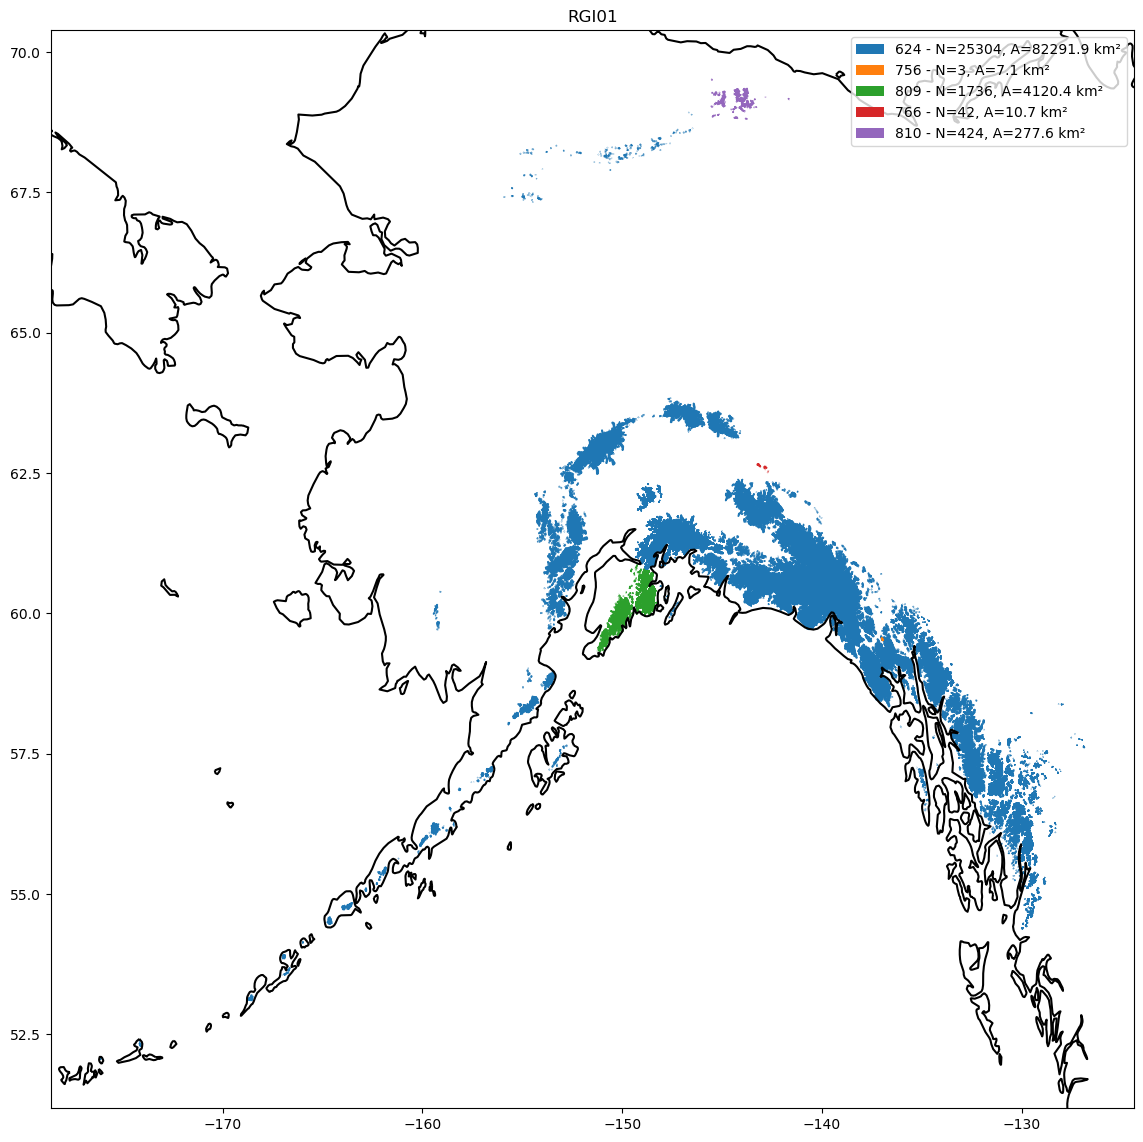

In [23]:
plot_map(rgi7, reg)

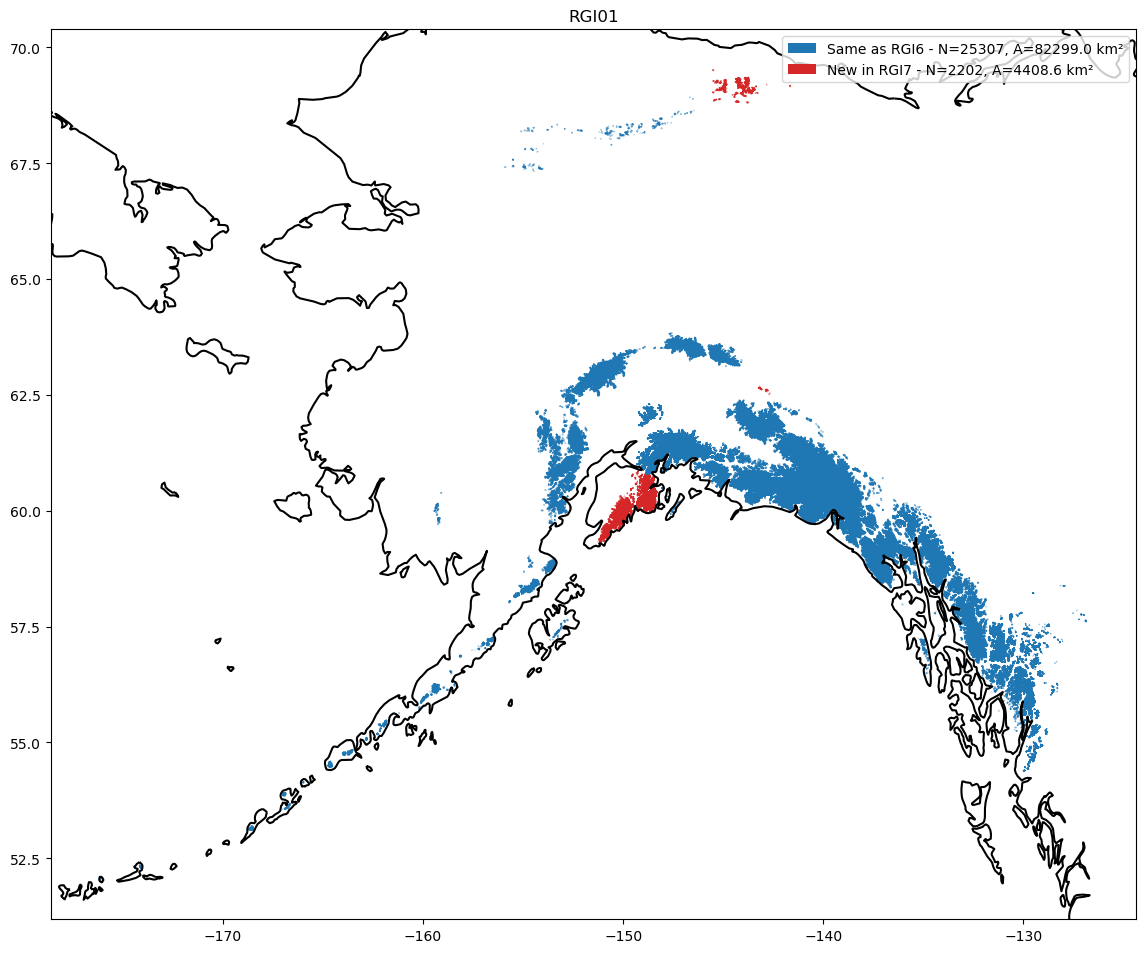

In [24]:
plot_map(rgi7, reg, is_rgi6=True)

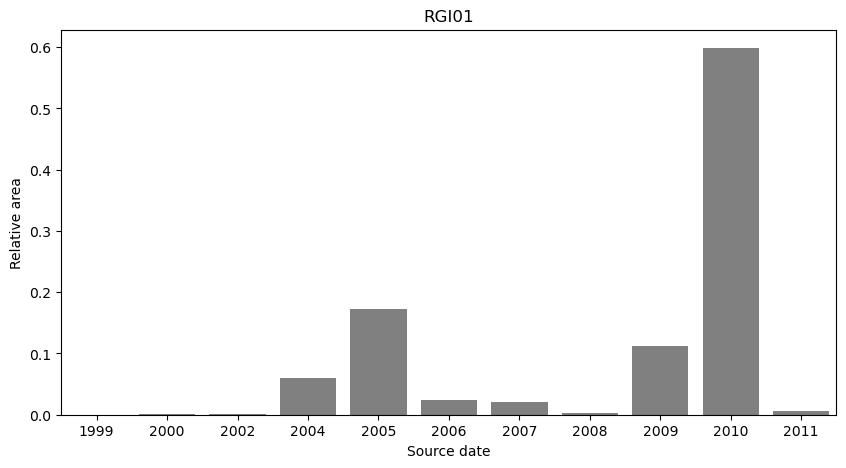

In [25]:
plot_date_hist(rgi7, reg)

### Text for github

In [26]:
fgh = sdf.T
fgh

subm_id                                                      624  \
N                                                          25304   
A                                                        82291.9   
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
submitters                                                Cogley   
release_date                                                2015   
geog_area      Randolph Glacier Inventory; Umbrella RC for me...   
src_date_mode                                               2010   
src_date_min                                                2000   
src_date_max                                                2011   

subm_id                                                      756  \
N                                                              3   
A                                                            7.1   
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
submitters                                                 Bolch   
release_date                                                2021   
geog_area      Randolph Glacier Inventory; Umbrella RC for me...   
src_date_mode                                               2010   
src_date_min                                                2010   
src_date_max                                                2010   

subm_id                    809     766  \
N                         1736      42   
A                       4120.4    10.7   
analysts            Paul, Yang  McNabb   
submitters                Yang  McNabb   
release_date              2022    2020   
geog_area      Kenai Peninsula  Alaska   
src_date_mode             2005    1999   
src_date_min              2005    1999   
src_date_max              2007    1999   

subm_id                                                      810  
N                                                            424  
A                                                          277.6  
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...  
submitters                                                  Paul  
release_date                                                2023  
geog_area      Randolph Glacier Inventory; Umbrella RC for me...  
src_date_mode                                               2007  
src_date_min                                                2000  
src_date_max                                                2007

In [27]:
print(fgh.to_markdown(headers=np.append(['subm_id'], fgh.columns)))

| subm_id       | 624                                                                                       | 756                                                                                       | 809             | 766    | 810                                                                                             |
|:--------------|:------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------|:----------------|:-------|:------------------------------------------------------------------------------------------------|
| N             | 25304                                                                                     | 3                                                                                         | 1736            | 42     | 424                                                                                             |
| A             | 8

In [28]:
fgh

subm_id                                                      624  \
N                                                          25304   
A                                                        82291.9   
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
submitters                                                Cogley   
release_date                                                2015   
geog_area      Randolph Glacier Inventory; Umbrella RC for me...   
src_date_mode                                               2010   
src_date_min                                                2000   
src_date_max                                                2011   

subm_id                                                      756  \
N                                                              3   
A                                                            7.1   
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...   
submitters                                                 Bolch   
release_date                                                2021   
geog_area      Randolph Glacier Inventory; Umbrella RC for me...   
src_date_mode                                               2010   
src_date_min                                                2010   
src_date_max                                                2010   

subm_id                    809     766  \
N                         1736      42   
A                       4120.4    10.7   
analysts            Paul, Yang  McNabb   
submitters                Yang  McNabb   
release_date              2022    2020   
geog_area      Kenai Peninsula  Alaska   
src_date_mode             2005    1999   
src_date_min              2005    1999   
src_date_max              2007    1999   

subm_id                                                      810  
N                                                            424  
A                                                          277.6  
analysts       Beedle, Berthier, Bolch, Burgess, Cogley, Fors...  
submitters                                                  Paul  
release_date                                                2023  
geog_area      Randolph Glacier Inventory; Umbrella RC for me...  
src_date_mode                                               2007  
src_date_min                                                2000  
src_date_max                                                2007

## Write out and tar 

In [29]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi7.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
RGI01/
RGI01/RGI01.prj
RGI01/RGI01.cpg
RGI01/RGI01.shx
RGI01/RGI01.shp
RGI01/RGI01.dbf
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI01.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI01'], returncode=0)


In [30]:
print('Done!')

Done!


## Consistency check with RGI6 

In [ ]:
# load reference data
from utils import open_zip_shapefile
rgi6 = open_zip_shapefile(rgi6_reg_file)

In [ ]:
len(rgi7), len(rgi6)

OK yeah the numbers changed for the new inventories.

Test the areas:

In [ ]:
rgi6['Area_us'] = rgi6.to_crs({'proj':'cea'}).area 

In [ ]:
print('Area RGI7a (km2)', rgi7['area'].sum() * 1e-6)
print('Area RGI6 (km2)', rgi6['Area'].sum())
print('Area RGI6 computed by us (km2)', rgi6['Area_us'].sum() * 1e-6)
print('diff areas RGI6 - RGI7 computed by us (km2)', (rgi6['Area_us'].sum() - rgi7['area'].sum()) * 1e-6)

Small diffs due to new inventories

### The code below is now obsolete! GLIMS issue fixed 

### Find the missing glacier 

In [ ]:
df_ref = rgi6.copy()
df_ref['area'] = rgi6['Area_us'] 

In [ ]:
import progressbar

In [ ]:
def xy_coord(geom):
    """To compute CenLon CenLat ourselves"""
    x, y = geom.xy
    return x[0], y[0]

In [ ]:
# compute CenLon CenLat ourselves
rp = df_ref.representative_point()

coordinates = np.array(list(rp.apply(xy_coord)))
df_ref['CenLon'] = coordinates[:, 0]
df_ref['CenLat'] = coordinates[:, 1]

In [ ]:
df_ref_orig = df_ref.copy()

In [ ]:
# Loop over all RGI7 glaciers and find their equivalent in ref
df_ref = df_ref_orig.copy()
not_found = {}
to_drop = []
for i, (ref_area, lon, lat) in progressbar.progressbar(enumerate(zip(rgi7['area'].values, rgi7.CenLon.values, rgi7.CenLat.values)), max_value=len(rgi7)):
#     dist = haversine(lon, lat, df_ref.CenLon.values, df_ref.CenLat.values)
    dist = (lon - df_ref.CenLon.values)**2 + (lat - df_ref.CenLat.values)**2 
    found = False
    for j in np.argsort(dist)[:10]:
        s6 = df_ref.iloc[j]
        if np.allclose(s6['area'], ref_area, rtol=0.001):
            found = True
            to_drop.append(s6.name)
            break
    if not found:
        not_found[i] = df_ref.iloc[np.argsort(dist)[:10]]
    if len(to_drop) > 1000:
        df_ref.drop(labels=to_drop, inplace=True)
        to_drop = []
df_ref.drop(labels=to_drop, inplace=True)

In [ ]:
print(len(not_found), len(df_ref))

In [ ]:
df_ref

In [ ]:
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].plot(edgecolor='k');

In [ ]:
pb_rgi7 = rgi7.iloc[list(not_found.keys())]

In [ ]:
pb_rgi7

In [ ]:
pb_rgi7.plot(edgecolor='k');

In [ ]:
df_ref

In [ ]:
df_ref.plot(edgecolor='k');

We have found the problem! Reported here: https://github.com/GLIMS-RGI/glims_issue_tracker/issues/5

In [ ]:
pb_rgi7.buffer(0).plot(edgecolor='k');

In [ ]:
# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_problem_glaciers'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_problem_glaciers_tar'))

In [ ]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].to_file(dd + f'RGI{reg:02d}_ref.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))